In [273]:
import numpy as np
import pandas as pd
import scipy
import random
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d

In [274]:
# (n-1)th order polynomial 
def polynomial(params, x):
    ans = np.zeros(x.shape[0])
    for p in range(x.shape[0]):
        for i in range(params.shape[0]):
            ans[p] += params[i]*(x[p]**i)
    return ans

def cost(params, x, y):
    ans = np.sum((y-polynomial(params, x))**2)
    return ans

def cost_regulation(params, x, y, lmd):
    ans = np.sum((y-polynomial(params, x))**2) + lmd*np.sum(params**2)
    return ans

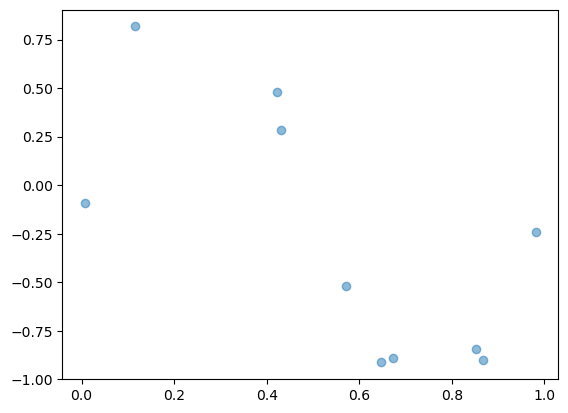

In [278]:
num = 10 # number of data points
idx = np.arange(num) 
x = np.zeros(num)
y = np.zeros(num)

for i in idx:
    noise = np.random.normal(0,0.1)
    x[i] = random.uniform(0, 1)
    y[i] = np.sin(2*np.pi*x[i]) + noise

plt.scatter(x,y, alpha =0.5)

In [291]:
n = 4 # number of polynomial coefficients
lmd = 0

init = np.ones(n)

bounds = []
for i in range(n):
    bounds.append((-10, 10))

# ans = scipy.optimize.differential_evolution(cost,
#                bounds,
#                args = (x, y),
#                disp = True,
#                maxiter = 10000
#               )

ans = scipy.optimize.minimize(cost_regulation,
        init,
        args = (x, y, lmd),
        tol = 1e-20)

ans_params = ans.x 
# print(ans.x)

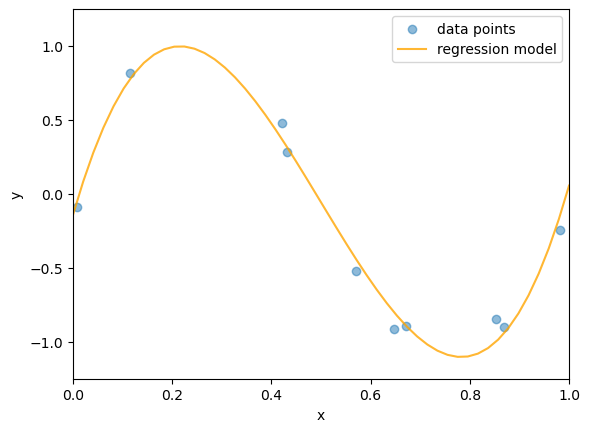

In [292]:

plt.scatter(x, y, alpha =0.5, label = "data points")
x_tick = np.linspace(0,1,50)
plt.plot(x_tick, polynomial(ans_params,x_tick), c = 'orange', alpha = 0.8, label = 'regression model')

plt.ylim(-1.25,1.25)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.scatter(x_tick, polynomial(ans_params,x_tick), c = 'orange', alpha = 0.8)
